# CH02

In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), ".."))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("../datasets/iris/iris.data")

In [4]:
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
X = df.iloc[0:100, [0, 2]].values

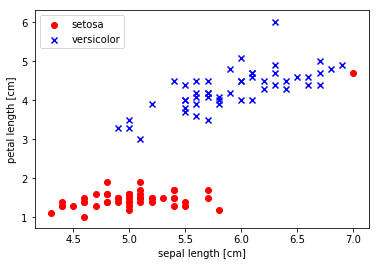

In [6]:
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

In [28]:
from ch2.models import Perceptron

In [29]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

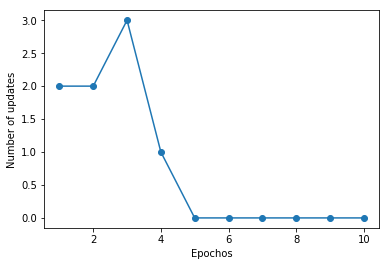

In [30]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochos")
plt.ylabel("Number of updates")
plt.show()

In [31]:
from utils import *

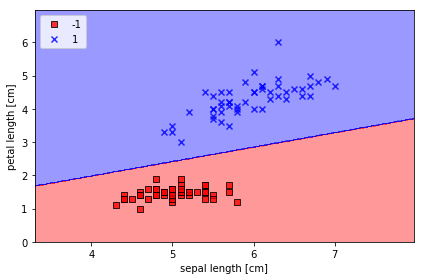

In [32]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

### Test 'plot_decision_regions'

In [12]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [13]:
resolution=0.02
xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution)
)

In [14]:
z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

In [15]:
z = z.reshape(xx1.shape)

In [16]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

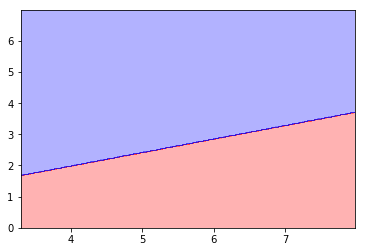

In [17]:
plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)

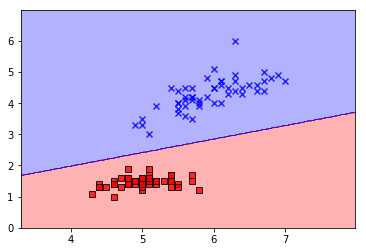

In [19]:
plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=cmap(idx),
                edgecolor='black',
                marker=markers[idx], 
                label=cl)
plt.show()

## Adaptive Linear Neuron

In [20]:
from ch2.models import AdalineGD

Text(0.5,1,'Adaline - Learning rate = 0.0001')

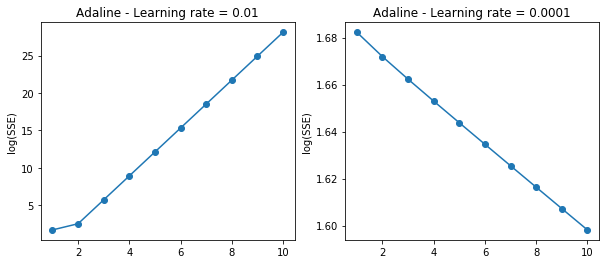

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker="o")
ax[0].set_ylabel("log(SSE)")
ax[0].set_title("Adaline - Learning rate = 0.01")

ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker="o")
ax[1].set_ylabel("log(SSE)")
ax[1].set_title("Adaline - Learning rate = 0.0001")

### Features scaling

In [36]:
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - np.mean(X_std[:,0])) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - np.mean(X_std[:,1])) / X_std[:,1].std()

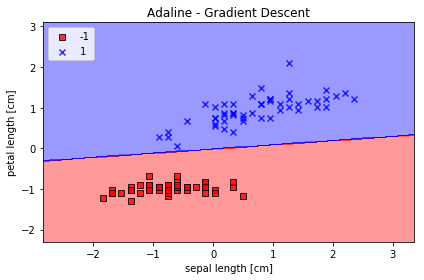

In [38]:
ada = AdalineGD(n_iter=15, eta=0.01).fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline - Gradient Descent")
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

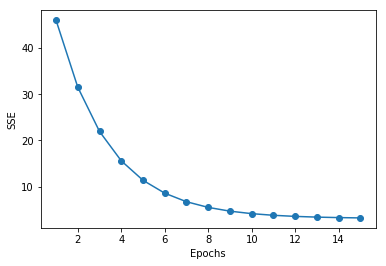

In [41]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.show()

## Questions & Exercises

### Questions
1. Describe MCP-Neuron model.
2. Explain the perceptron learning rule.
3. Describe adaptive linear neuron model. What are the main differences to perceptron.
4. Describe gradient descent method and explain how it is used to optimize the weights in Adaline.
5. What are the differences between batch gradient descent and stochastic gradient descent.

### Exercises

1. Implement multi-class classifier that will enable to combine different kind of classifiers.
2. Implement mini-batch gradient descent.

## Multi-class Classifier

In [5]:
from ch2.models import MultiClassClassifier, AdalineGD

In [6]:
y = df.iloc[:, 4].values
X = df.iloc[:, 0:4].values

X_std = np.copy(X)
for i in range(X.shape[1]):
    X_std[:,i] = (X_std[:,i] - np.mean(X_std[:,i])) / X_std[:,i].std()

In [14]:
mclf = MultiClassClassifier(AdalineGD, n_iter=100, eta=0.001)
mclf.fit(X_std, y)

yhat = mclf.predict(X_std)

np.sum(yhat == y)/np.shape(X_std)[0]

0.85906040268456374

## Mini-batch gradient descent

In [42]:
from ch2.models import AdalineMBGD
from utils import *

In [9]:
df = pd.read_csv("../datasets/iris/iris.data")

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [39]:
ada = AdalineMBGD(batch=10, n_iter=25, eta=0.001, random_state=1)
ada.fit(X, y)

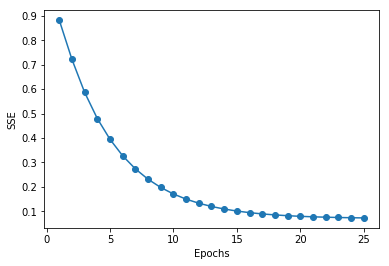

In [40]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("SSE")
plt.show()

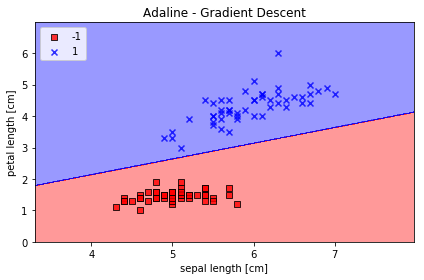

In [44]:
plot_decision_regions(X, y, classifier=ada)
plt.title("Adaline - Gradient Descent")
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()